In [3]:
import numpy as np
V_s = 1
X_s = 0.25
X_v = 0.05
I_s = 1.0
V_ref = 1.2
V_t = 1.2

for it in range(10):
    V_t = V_ref - 1j*X_v*I_s
    I_s = (V_t - V_s)/(1j*X_s) 

    print(f'I_s = {np.abs(I_s):0.1f}, V_t = {np.abs(V_t):0.1f}')


I_s = 0.8, V_t = 1.2
I_s = 0.6, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2
I_s = 0.7, V_t = 1.2


In [12]:
import smib_vsc_l_i_vsg_ll

model = smib_vsc_l_i_vsg_ll.model()

zeta = 0.2 # 1.0/np.sqrt(2) # desired damping
H_v = 5.0  # desired inertia
WB = 2 *np.pi* 50 # base frequency
R_v = 0.1  # virtual resistance (pu-m)
X_v = 0.25  # virtual reactance (pu-m)

Lt = X_v 
P_max = 1/Lt
fn = np.sqrt(WB*P_max/(2*H_v))/(2*np.pi)

Lt = X_v 
P_max = 1/Lt
fn = np.sqrt(WB*P_max/(2*H_v))/(2*np.pi)

# Active power loop
Dp = 1e-6;
K_i = (2*np.pi*fn)**2/(WB*P_max);
K_g = Dp*K_i;
K_p = (2*zeta*2*np.pi*fn - K_g)/(WB*P_max);
print(f'K_p = {K_p}, K_i = {K_i}, K_g = {K_g}')

# # Active power loop (i)
# Snom = 1e6
# P_max = Snom/X_v
# D = 0.9
# H = 1
# Wnom = 2 *np.pi* 50 # base frequency
# K_p = D*np.sqrt(2*Wnom/(P_max*H*Snom))
# K_g = 1e-6;
# K_i = Wnom/(2*H*Snom)
# print(f'K_p = {K_p}, K_i = {K_i}, K_g = {K_g}')

# Active power loop (i)
Snom = 1e6
P_max = 1/X_v
D = 0.9
H = 1
Wnom = 2 *np.pi* 50 # base frequency
K_p = D*np.sqrt(2/(P_max*H*Wnom))
K_g = 1e-6;
K_i = 1/(2*H)
print(f'K_p = {K_p}, K_i = {K_i}, K_g = {K_g}')


# Reactive power loop
T_q = 1.0/(2*np.pi*0.5/2)
K_q = (1.0 - 0.0)/(1.05 - 0.95)
K_i_q = 1e1

# Operating point
p_l_1 = 0.5     # VSG virtual local power reference
v_ref_1 = 1.0  # VSG POI voltage reference
X_s = 0.05 # VSC actual coupling reactance
R_s = 0.0 # VSC actual coupling resistance

params = {"S_n_1":1e6, # VSC nominal power
          'p_l_1':p_l_1,'v_ref_1':v_ref_1, # VSG local references
          'X_s_1':X_s,'R_s_1':R_s,  # VSC actual coupling impedance
          'X_v_1': X_v-X_s, 'R_v_1':R_v-R_s,
          'T_q_1':T_q,'K_q_1':K_q, # Reactive power loop
          'K_i_1':K_i,'K_g_1':K_g,'K_p_1':K_p, # Active power loop
          #'b_1_2':-2 # Line susceptance
          }

model.ini(params,'xy_0.json')
#model.report_x()

K_p = 0.0035682481527280706, K_i = 0.1, K_g = 1e-07
K_p = 0.03590480523612894, K_i = 0.5, K_g = 1e-06


True

In [13]:
V_t = -X_s/X_v*V_t + X_s/X_v*V_ref + V_s
 

In [24]:
import numpy as np
import matplotlib.pyplot as plt


Z_v = 0.1 + 1j*0.25
Z_s = 1j*0.05
Z_line = 1j*0.1
V_inf = 1.0
Z_src = 1j*0.1

# power flow
S_s = 0.5000111421049822+0.012523640138206962j # de pydae ini()
V_s = 0.9987506918206023+0.05000111421049822j  # de pydae ini()

# backward
I_s = np.conjugate(S_s/V_s)
V_ref = V_s + (Z_s+Z_v)*I_s
theta_ref = np.angle(V_ref)
V_ref_m = np.abs(V_ref)

theta_ref_0 = theta_ref
V_ref_m_0 = np.abs(V_ref)
print('theta_ref_0 = ',np.angle(V_ref, deg = True))

# foreward
times = np.arange(0,10,0.00833)
records = {'P':[],'Q':[],'V_ref_m':[],'I_s_m':[],'V_s_m':[],'V_t_m':[]}
for it,t in enumerate(times):

    # references
    theta_ref = theta_ref_0
    V_ref_m = V_ref_m_0
    if t>1: 
        V_ref_m = 1.07
        theta_ref = theta_ref_0
    if t>2: 
        V_ref_m = 1.05
        theta_ref = theta_ref_0 
    if t>3: 
        V_ref_m = 1.05
        theta_ref = theta_ref_0 + 0.05
    if t>4: 
        V_ref_m = 1.05
        theta_ref = theta_ref_0 + 0.02

    # model
    V_t = V_s + Z_s*I_s
    V_ref = V_ref_m*np.exp(1j*theta_ref)
    I_s = (V_ref - V_t)/Z_v
    I_src = I_s + V_s/Z_src

    # psse
    I_s = I_src - V_s/Z_src     
    V_s = V_inf + I_s * Z_line
    S_s = V_s*np.conjugate(I_s)

    # records
    records['P'] += [S_s.real]
    records['Q'] += [S_s.imag]
    records['V_s_m'] += [np.abs(V_s)]
    records['I_s_m'] += [np.abs(I_s)]
    records['V_t_m'] += [np.abs(V_t)]
    #print(f't = {t:3.3f}: I_s = {np.abs(I_s):0.4f}, V_t = {np.abs(V_t):0.4f}, S_s = {S_s.real:0.2f} + j{S_s.imag:0.2f}')


fig,axes = plt.subplots()

axes.plot(times,records['I_s_m'])
axes.plot(times,records['V_t_m'])

theta_ref_0 =  10.900937666094366


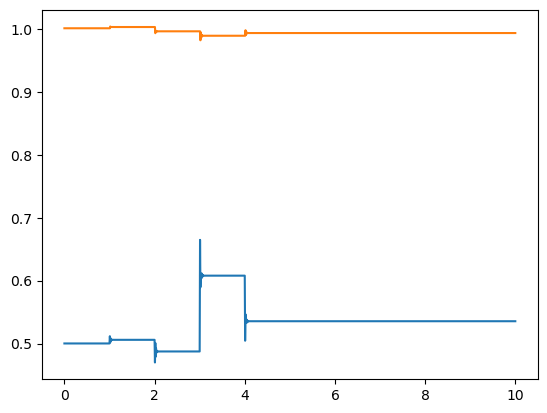

In [25]:
import matplotlib.pyplot as plt


In [10]:
import numpy as np
V_s = 1
X_s = 0.05
X_v = 0.25
I_s = 1.0
V_ref = 1.2
V_t = 1.2

for it in range(10):
    V_t = V_s + 1j*X_s*I_s
    I_s = (V_ref - V_t)/(1j*X_v) 

    print(f'I_s = {np.abs(I_s):0.1f}, V_t = {np.abs(V_t):0.1f}')


I_s = 0.8, V_t = 1.0
I_s = 0.6, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
I_s = 0.7, V_t = 1.0
